# Matplotlib

The first step is to import the relevant headers. **pyplot** is the workhorse that we will use to perform most of the work. We will also use **image**, **patches** and **collections**. We're also importing numpy and pandas for convenience in data manipulation.

In [53]:
import matplotlib.pyplot as plt

import matplotlib.image as mpimg
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

import numpy as np
import pandas as pd

Set the default size of all figures to 15x10 inches

In [54]:
plt.rcParams["figure.figsize"] = (15,10)

# Basic plot

For quick and dirty plots, you can just use **plt.plot**. It won't be pretty, but it will get the job done.

In [55]:
x = np.linspace(0, 2*np.pi, 50)
y = np.sin(x)

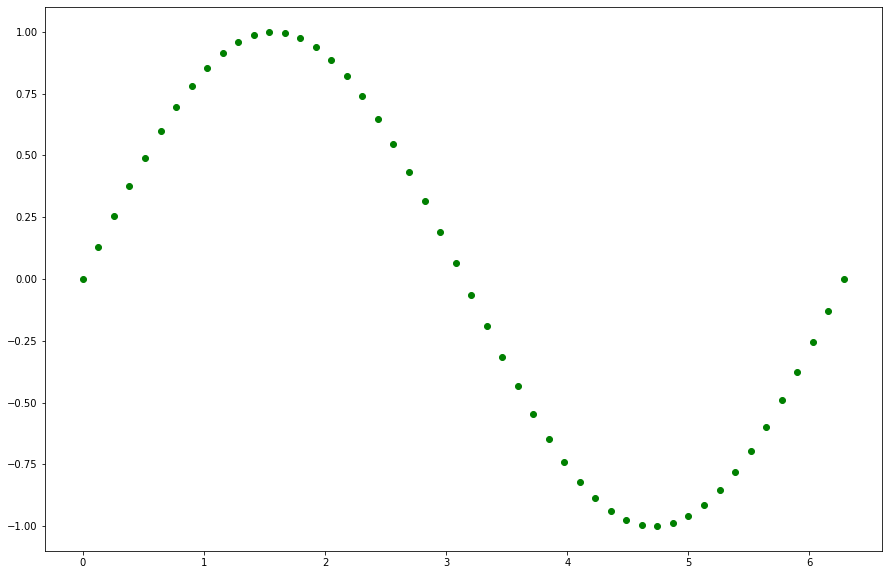

In [58]:
plt.plot(x, y, 'o', color='green')

Naturally, we can also choose the color of the line to use:

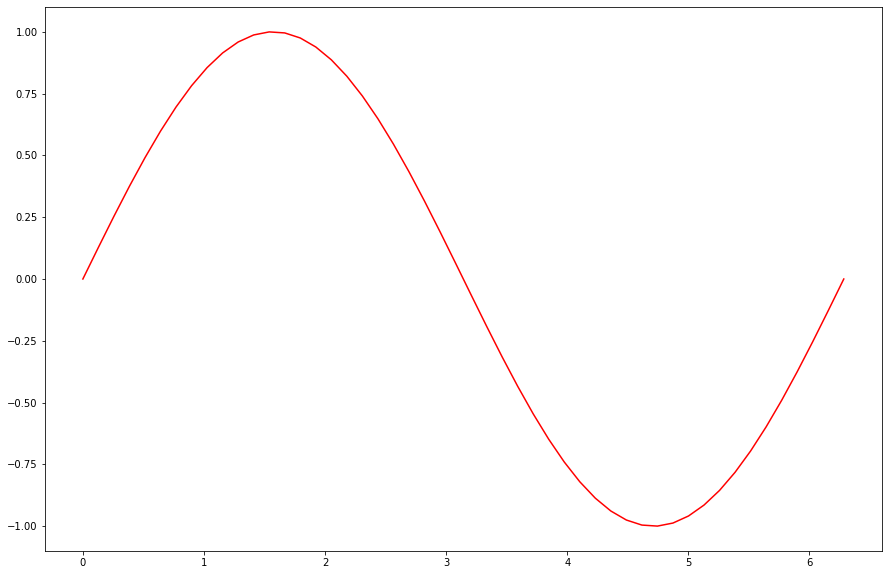

In [59]:
plt.plot(x, y, 'red')

Easily add a legend

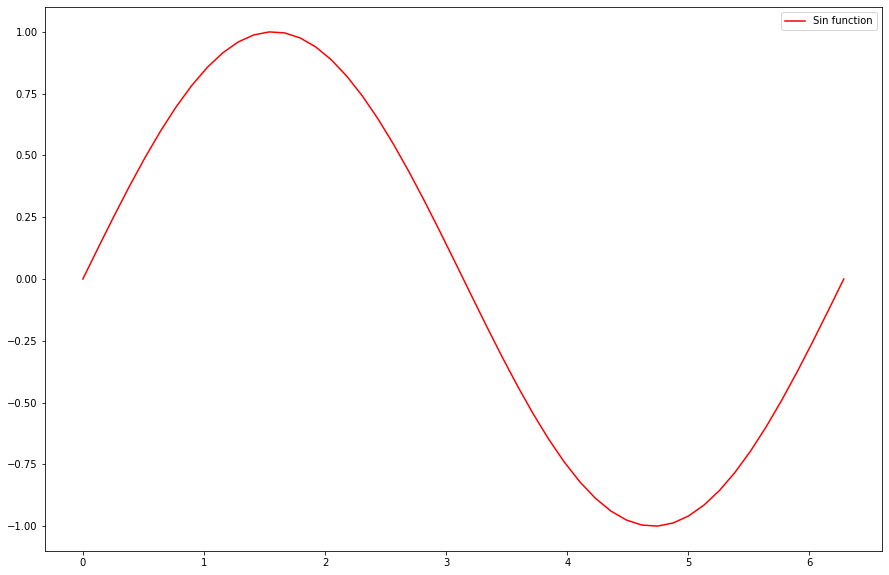

In [6]:
plt.plot(x, y, 'red')
plt.legend(['Sin function'])

Note that for the legend you just need to provide the text, matplotlib takes care of adding the corresponding lines and symbols. More complex plots can be built by calling the plot function multiple times in sequence:

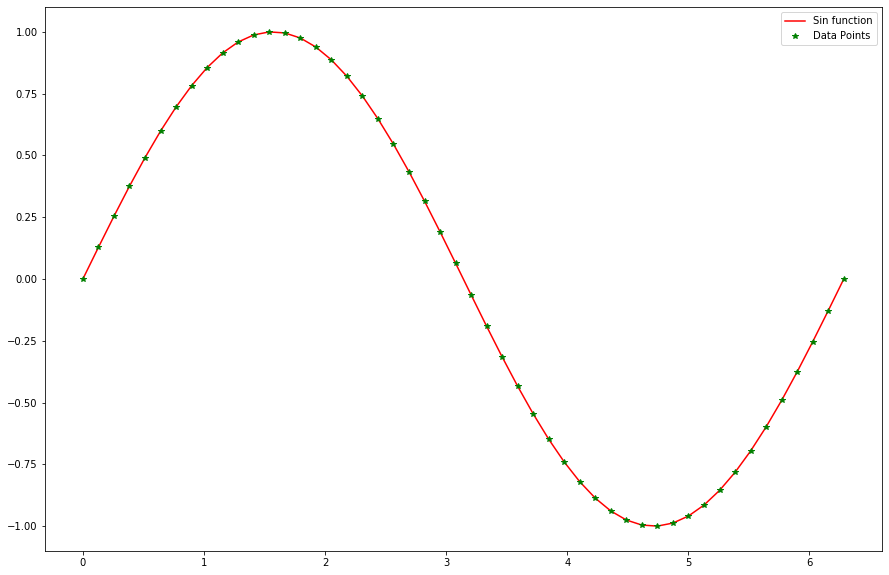

In [62]:
g = plt.plot(x, y, 'r-')
plt.plot(x, y, 'g*')
plt.legend(['Sin function', 'Data Points'])

# Scatter plot

Let's do something slightly more serious. We start by loading some data from a csv file using **pandas**.

Marriage age data from: https://www.statcrunch.com/5.0/viewreport.php?reportid=41662

In [66]:
ages = pd.read_csv('data/ages.csv')

Let's take a quick look at the data to make sure it is correct.

In [67]:
ages.head()

,Wife,Husband
0,43,49
1,28,25
2,30,40
3,57,52
4,52,58


Here we make a simple scatter plot using the (**plt.scatter***) function. Axis labels are set and the figure is saved to disk at a 300dpi resolution.

Text(0, 0.5, 'Husband')

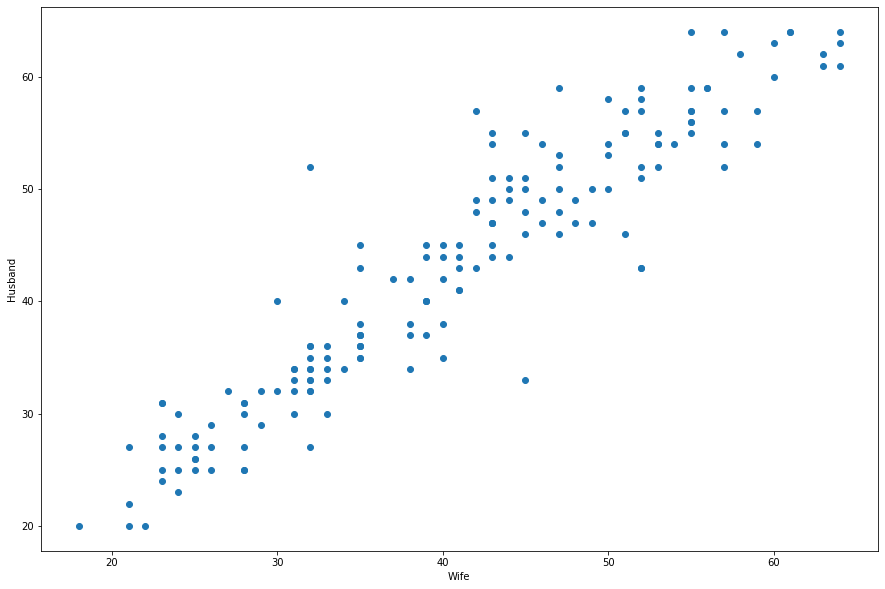

In [68]:
plt.scatter(ages['Wife'], ages['Husband'])
plt.xlabel("Wife")
plt.ylabel("Husband")


And we can save the figure to disk

In [11]:
plt.savefig('data/ages.png', dpi=300)

<Figure size 1080x720 with 0 Axes>

Naturally, we could also have used the pandas internal plotting functionality. Indeed, pandas, like many other plotting libraries just use matplotlib in the background so you can do things like:

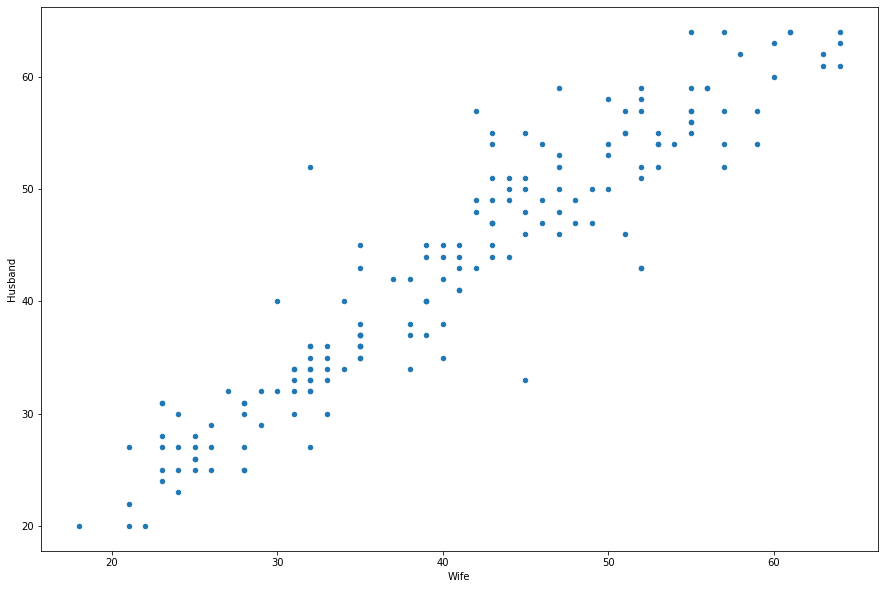

In [12]:
ages.plot.scatter(x='Wife',y='Husband')

Text(0.5, 1.0, 'Age at marriage')

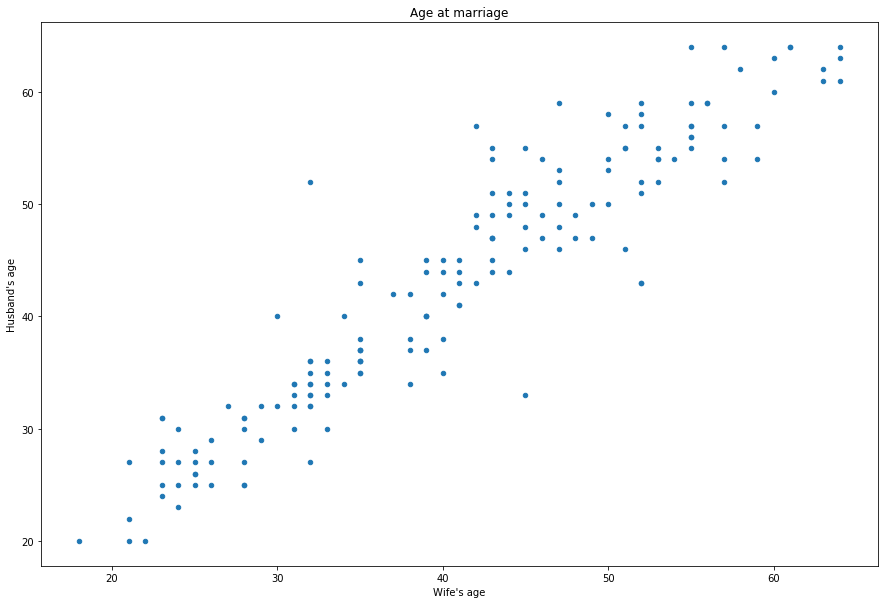

In [13]:
ages.plot.scatter(x='Wife',y='Husband')
ax = plt.gca()
ax.set_xlabel("Wife's age")
ax.set_ylabel("Husband's age")
ax.set_title('Age at marriage')

where we used **plt.gca()** to get a reference to the current Axes object generated by **pandas** that we were then free to customize using standard **matplotlib** commands. 

We can even add other plots to the axis object returned by **pandas**

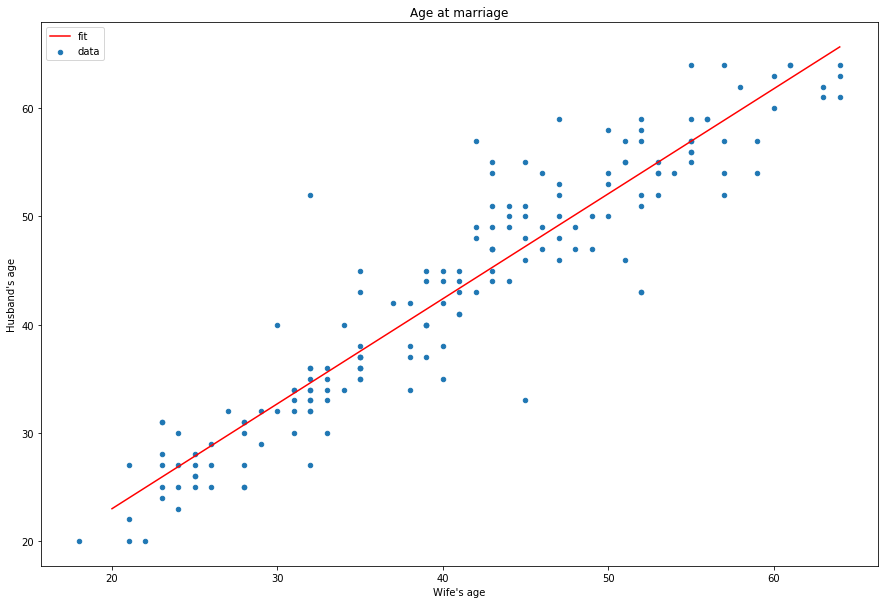

In [14]:
fit_x = np.arange(20,65)
fit_y = 3.59+0.97*fit_x

ages.plot.scatter(x='Wife',y='Husband')
ax = plt.gca()
ax.set_xlabel("Wife's age")
ax.set_ylabel("Husband's age")
ax.set_title('Age at marriage')
ax.plot(fit_x, fit_y, 'r-')
ax.legend(['fit', 'data'])

# Bar plot

**matplotlib** supports several basic types of plots out of the box. To illustrate the bar plot we will use some made up data:

In [15]:
dataLA = [20, 14, 23]
dataSF = [11, 18, 28]

pos = np.arange(0, 5, 2)
width = 0.5

Here we have two different datasets with 3 data points (classes) each. We could simply call **plt.bar** to generate the figure, similarly to what we did just above. In this case, we will take this opportunity to illustrate how to use **subplots** and the figure/axes interface in a relatively simple example. Afterward we will use this same interface to build more sophisticated examples.

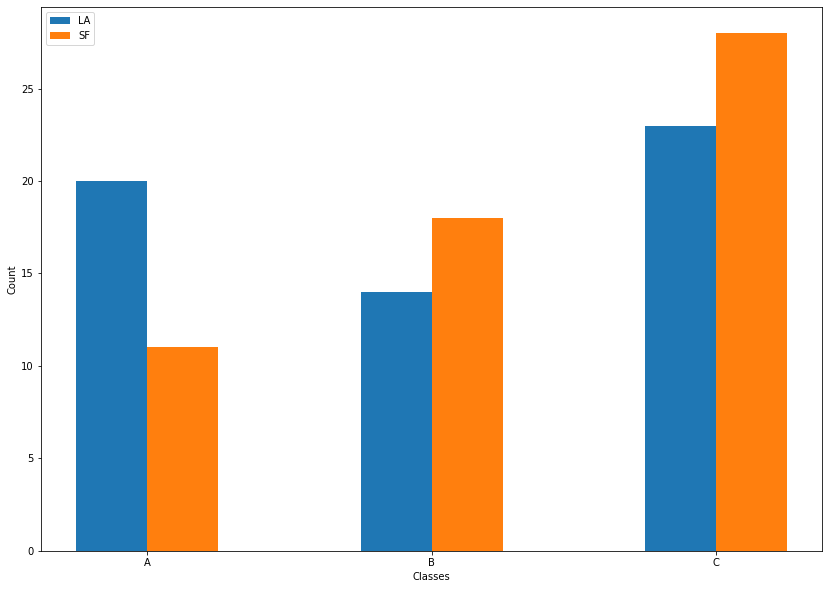

In [16]:
fig, ax = plt.subplots(1)
fig.set_size_inches(14,10)

ax.bar(pos, dataLA, width=width, label="LA")
ax.bar(pos+width, dataSF, width=width, label="SF")

ax.set_ylabel('Count')
ax.set_xlabel('Classes')
ax.set_xticks(pos + width / 2)
ax.set_xticklabels(('A', 'B', 'C'))

ax.legend()

# Pie plot

Pie plots are **EVIL**! But just in case you are too... Here we use the **figsize** parameter to **plt.figure** to set the figure size in inches. Notice that this is slightly different than what we did above.

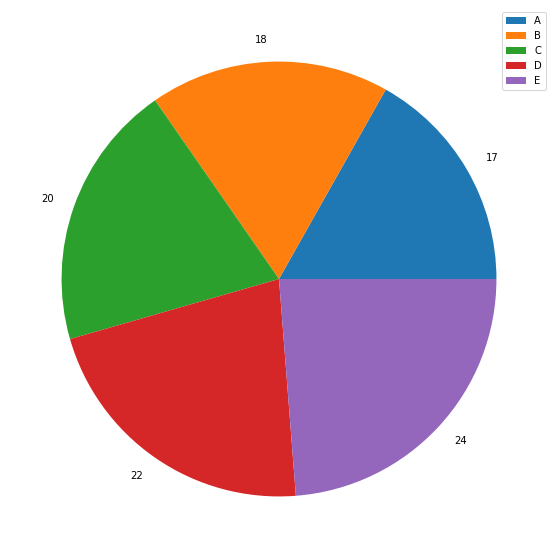

In [17]:
data = [17, 18, 20, 22, 24]

fig = plt.figure(figsize=(10,10))
ax = plt.gca()

ax.pie(data, labels=data)
ax.legend(["A", "B", "C", "D", "E"])

# Comparison of Pie and Bar plots

As we discussed, you should avoid using pie plots in most cases. This is specially true when the values of each wedge are very similar. To illustrate this point let's make up some data:

In [18]:
dataA = [17, 18, 20, 22, 24]
dataB = [20, 20, 19, 21, 20]
dataC = [24, 22, 20, 18, 17]

We'll plot these three datasets using both bar and pie plots. As we want to make sure we use the same colors for the corresponding bar/slice, we start by explicitly obtaining the color cycle

In [19]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
print(colors)

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


Now we can supply the right color sequence to use for the bars

(0, 25)

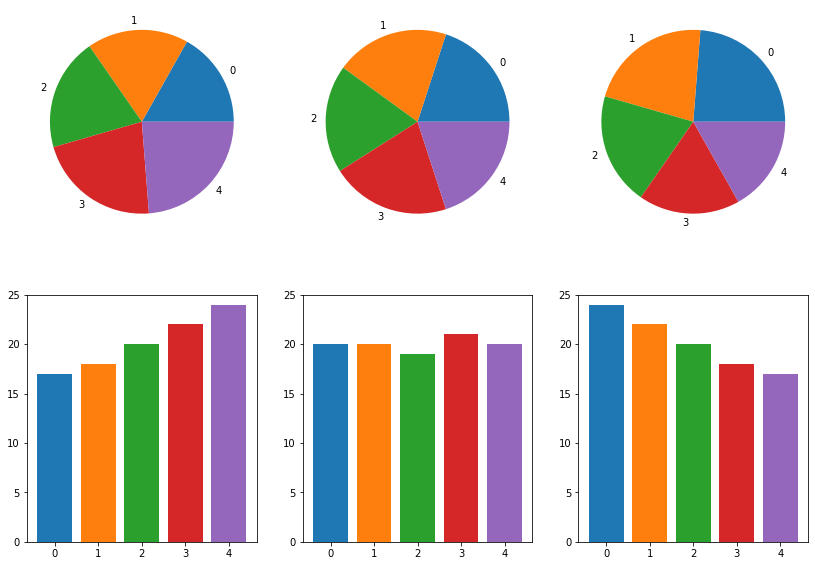

In [20]:
fig, axs = plt.subplots(nrows=2, ncols=3)
fig.set_size_inches(14,10)

axs[0][0].pie(dataA, labels=range(5))
axs[0][1].pie(dataB, labels=range(5))
axs[0][2].pie(dataC, labels=range(5))

axs[1][0].bar(x=range(5), height=dataA, color=colors)
axs[1][0].set_ylim(0, 25)
axs[1][1].bar(x=range(5), height=dataB, color=colors)
axs[1][1].set_ylim(0, 25)
axs[1][2].bar(x=range(5), height=dataC, color=colors)
axs[1][2].set_ylim(0, 25)

As you can see, the differences are much more easily seen in the bar plots! This is also a nice illustration of how you can easily combine multiple different subplots into a compelling figure

Notice also, that, by default the matplotlib bar function uses the same color for all the bars in the same data series while it uses a different color for each pie slidce. We got around this by setting the colors of each bar manually. To make sure that the colors matched the ones used in the pie plots, we manually obtained the colors from the color cycle that matplotlib lib uses. 

A similar effect could have been obtained by calling **plt.bar** for each individual bar:

<BarContainer object of 1 artists>

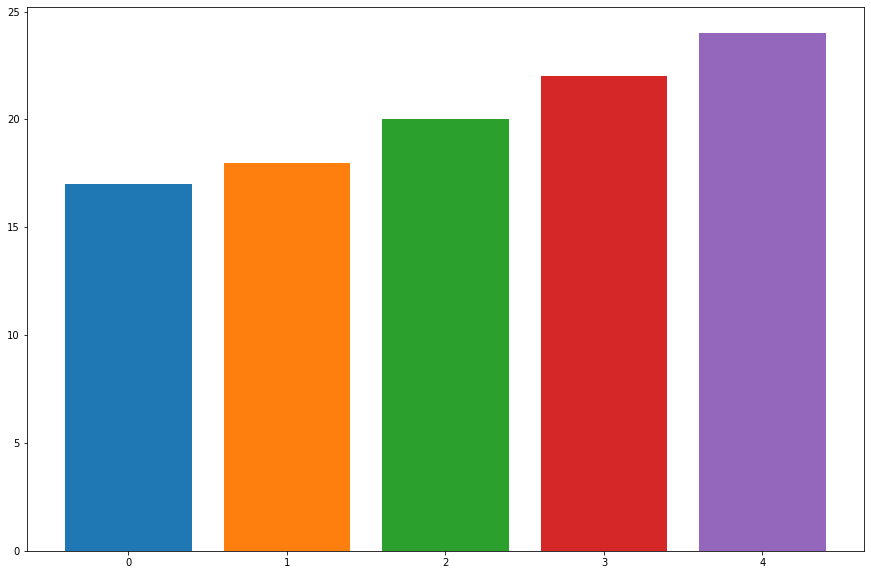

In [21]:
plt.bar(x=0, height=17)
plt.bar(x=1, height=18)
plt.bar(x=2, height=20)
plt.bar(x=3, height=22)
plt.bar(x=4, height=24)

# Bubble plot

We've covered the most fundamental functionality of **matplotlib**. With some creativity, we're already able to create some sophisticated types of visualizations. Let's start by loading some data from https://www.gapminder.org/

In [45]:
data = pd.read_csv('data/gapminder.csv')

In [23]:
data.head()

,Country,GDP,Population,LifeExpectancy,Continent
0,Algeria,6223.367465,33333216,72.301,0
1,Angola,4797.231267,12420476,42.731,0
2,Benin,1441.284873,8078314,56.728,0
3,Botswana,12569.851770,1639131,50.728,0
4,Burkina Faso,1217.032994,14326203,52.295,0


Let's take a look at the data

And define some useful arrays.

In [24]:
colors = np.array([
    '#5A6FFA',
    '#E60DA1',
    "#7E7E7E",
    "#B7F025",
    "#FF9A1E"])

continents = [
    'Africa',
    'Americas',
    'Asia',
    'Europe',
    'Oceania']

As we can see, there are several features associated with each country. Here we will create a Bubble plot to encode all 4 features in a single plot:

-  GDP - x-axis, log scale
-  Life Expectancy - y-axis
-  Population - bubble size/area
-  Continent - bubble color

Finally, we will manually add a legend using **ax.text** to write the name of each continent with the respective color. 

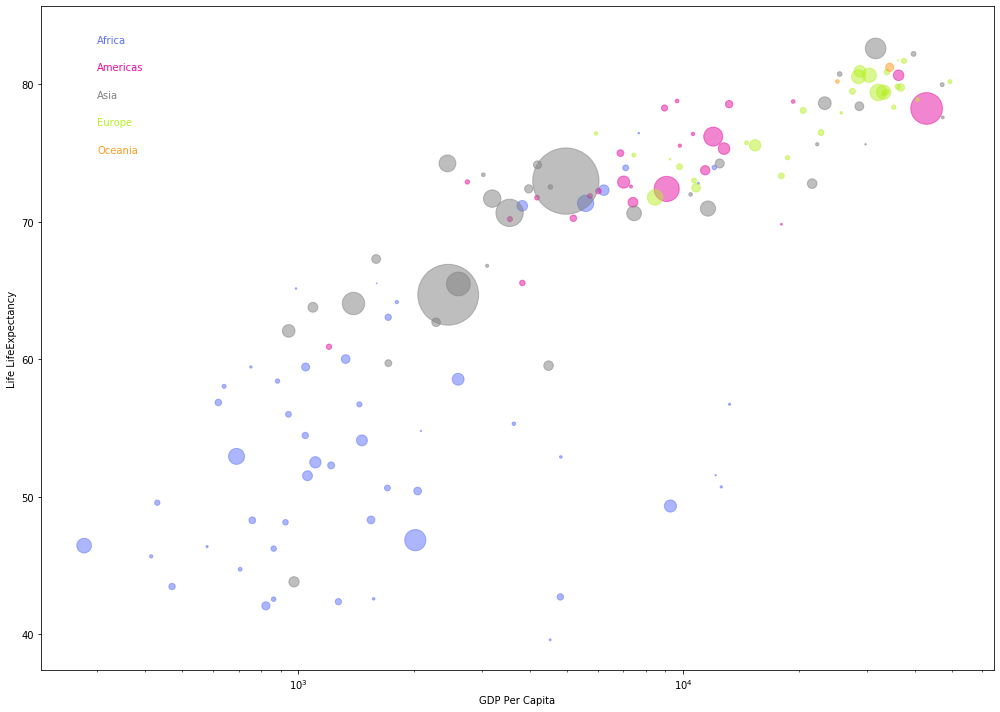

In [25]:
fig = plt.figure()
ax = plt.gca()

fig.set_size_inches(14,10)

for i in range(5):
    continent = data[data['Continent']==i]
    ax.scatter(continent['GDP'], continent['LifeExpectancy'], 
               s=(continent['Population'])/300000, 
               c=colors[i], alpha=0.5)

ax.set_xscale('log')

for i in range(len(continents)):
    ax.text(300, 83-i*2, continents[i], color=colors[i])

ax.set_xlabel('GDP Per Capita')
ax.set_ylabel('Life LifeExpectancy')

fig.tight_layout()

This kind of plot was made famoous by Hans Rosling, one of the great science communicators of our time, during his Gapminder Foundation work. If you haven't seen it, I highly recommend his [TED talk](https://www.youtube.com/watch?v=hVimVzgtD6w) and his recent (postumous) book [Factfulness: Ten Reasons We're Wrong About the World](https://www.amazon.com/Factfulness-Reasons-Wrong-Things-Better-ebook/dp/B0769XK7D6)

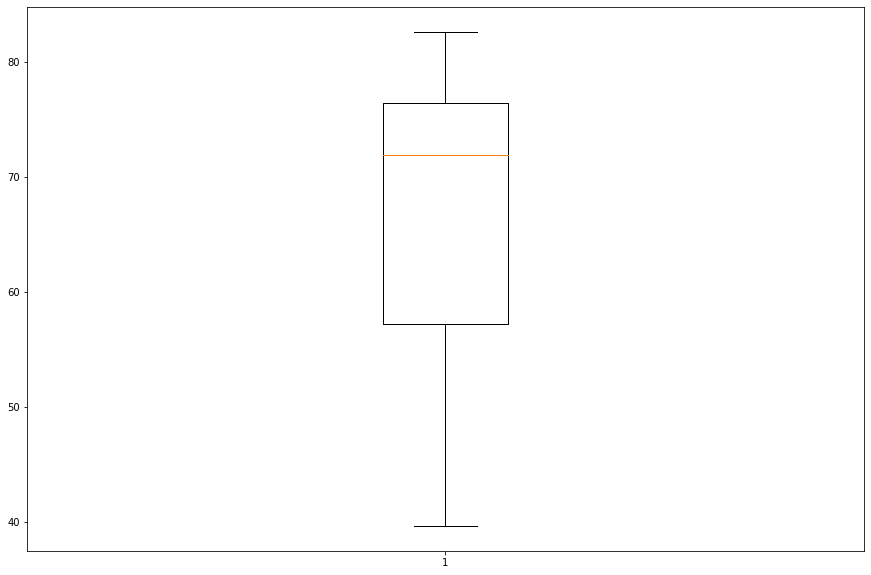

In [26]:
_= plt.boxplot(data.LifeExpectancy)

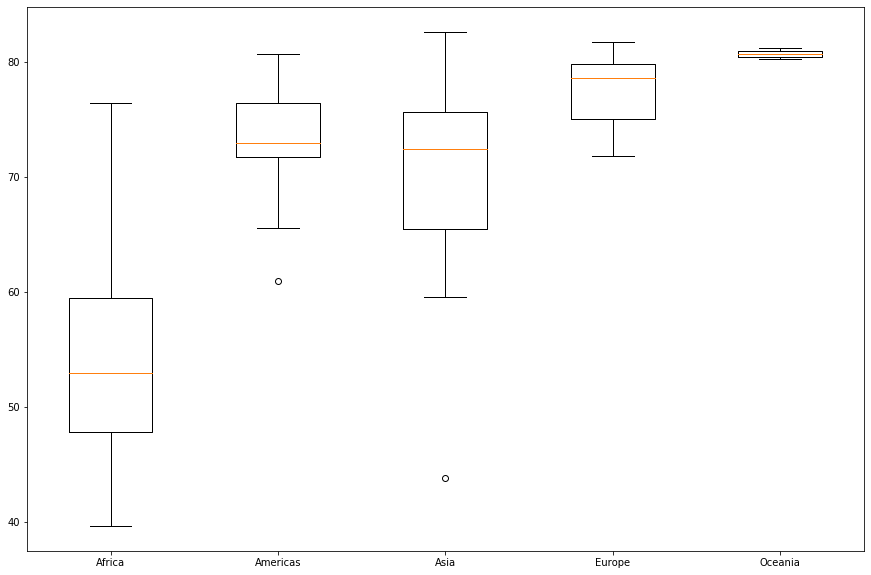

In [41]:
fig, ax = plt.subplots()
_= plt.boxplot([data.get(data.Continent==d).LifeExpectancy for d in range(0,5)])
_= ax.set_xticklabels(continents)

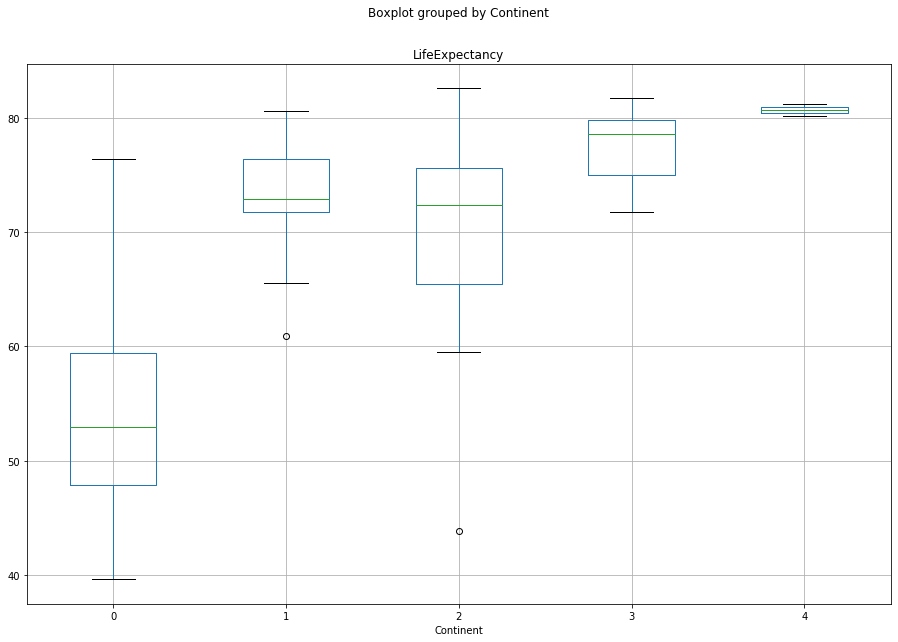

In [46]:
# replace Continent with actual names
_= data.boxplot(column='LifeExpectancy', by='Continent')

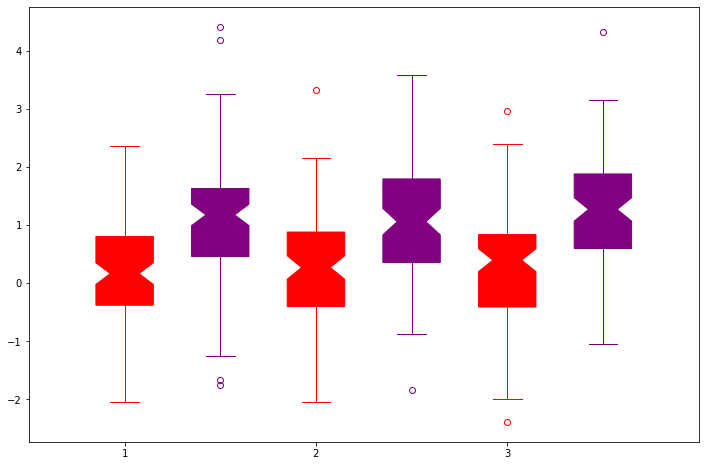

In [47]:
import matplotlib.pyplot as plt
import numpy as np
data = np.random.normal(0.1, size=(100,6))
data[76:79,:] = np.ones((3,6))+0.2

plt.figure(figsize=(12,8))
# option 1, specify props dictionaries
c = "red"
plt.boxplot(data[:,:3], positions=[1,2,3], notch=True, patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c),
            )


# option 2, set all colors individually
c2 = "purple"
box1 = plt.boxplot(data[:,::-2]+1, positions=[1.5,2.5,3.5], notch=True, patch_artist=True)
for item in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(box1[item], color=c2)
plt.setp(box1["boxes"], facecolor=c2)
plt.setp(box1["fliers"], markeredgecolor=c2)


plt.xlim(0.5,4)
plt.xticks([1,2,3], [1,2,3])
plt.show()

# Age pyramid

Another well known plot type that we can easily build is age pyramids. Let's start by loading some data:

In [39]:
pyramid = pd.read_csv('data/pyramid.csv')

This is the Mombasa Population Pyramid Age Groups in 2009 we downloaded from: http://www.opendata.go.ke/datasets/55d384fb963a47d2ad9f131240abfb7c_0/data.

In [40]:
pyramid.head()

,Age,Female,Male,Male_Inverse,OBJECTID
0,0 - 10,113083,114153,-114153,0
1,10 - 20,88861,80755,-80755,1
2,20 - 30,130033,120694,-120694,2
3,30 - 40,66020,92146,-92146,3
4,40 - 50,28289,45107,-45107,4


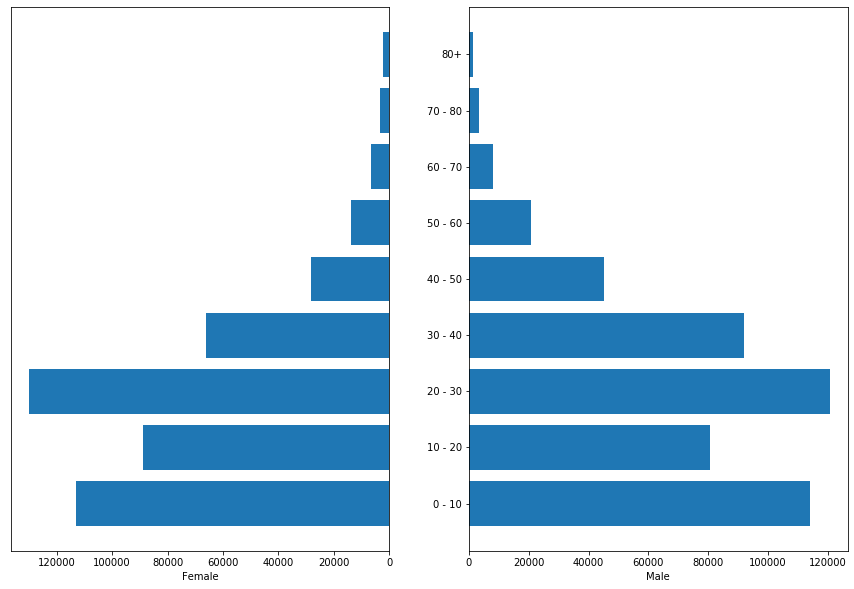

In [41]:
fig, axs = plt.subplots(1, 2, sharey=False, sharex=False)
axs[0].barh(range(9), pyramid['Female'])
axs[1].barh(range(9), pyramid['Male'])

axs[0].invert_xaxis()
axs[0].set_yticks([])
axs[0].set_yticklabels('')

axs[1].set_yticks(range(9))
axs[1].set_yticklabels(pyramid['Age'])

axs[0].set_xlabel('Female')
axs[1].set_xlabel('Male')

fig.subplots_adjust(wspace=0.21)

Here we used **barh** the horizontal version of the bar plots, and **invert_axis** to flip the direction of the *x-axis* in the first subplot.

# Images

We can also manage images

In [50]:
img=mpimg.imread('data/tutorial_matplotlib.png')

We can plot it easily using **imshow**

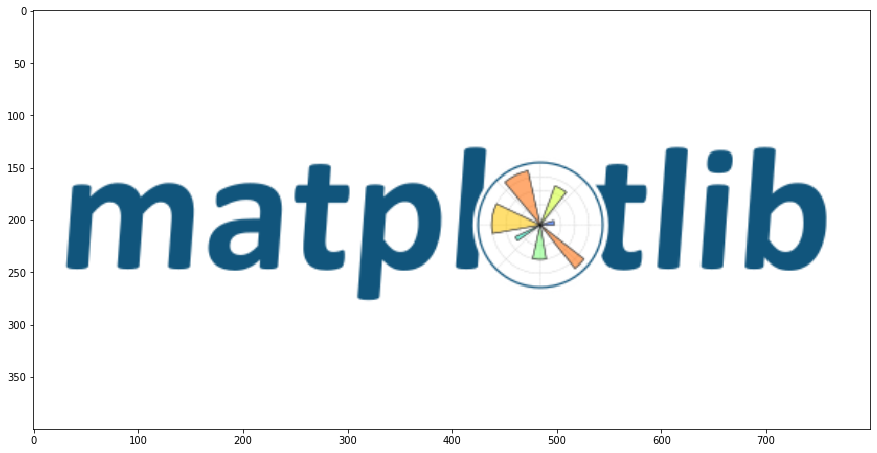

In [51]:
plt.imshow(img)

It's very useful to keep in mind that images are just arrays of numbers.

In [52]:
print(img.dtype, img.shape)

float32 (400, 800, 4)
